In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq

In [18]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def find_vals(X,Y,cut):
    dataX = X[cut:]
    dataY = Y[cut:]
    minn = min(dataY)
    sig_val = minn*0.5
    MeanLoc = np.where(dataY==minn)[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    FWHM = (Rpoint-Lpoint)   
    return (Mean,FWHM)

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
cd /Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/

/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar


In [5]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob('*.txt')
#files.remove('.DS_Store')
files.sort()
files

['050-clean.txt',
 '075-clean.txt',
 '100-clean.txt',
 '125-clean.txt',
 '150-clean.txt',
 '175-clean.txt',
 '200-clean.txt']

In [6]:
ml = 1e3
Hold = np.loadtxt('200-clean.txt')
X = Hold[0]*ml
Y = Hold[1]*ml

In [7]:
TriggerTime = find_nearest(X,0)
Trigger     = np.where(X==TriggerTime)[0][0]
Cut = Trigger+100

minPulseHold = find_nearest(Y,min(Y[2*Cut:]))
minPulse     = np.where(Y==minPulseHold)[0][0]

eh = Cut + (minPulse-Cut)/2
eh

8367.0

In [8]:
Cut

5100

In [115]:
def exponenial_func(x, a, b, c):
    return a*np.exp(-x/b)+c

#moving_average(X[Cut:eh],aa),moving_average(Y[Cut:eh],aa)
xes = moving_average(X[Cut:eh],aa)
yes = moving_average(Y[Cut:eh],aa)

popt, pcov = curve_fit(exponenial_func, moving_average(X[Cut:eh],aa), moving_average(Y[Cut:eh],aa))

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [116]:
popt

array([ -0.41741994,  18.26333727,  -0.05671974])

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


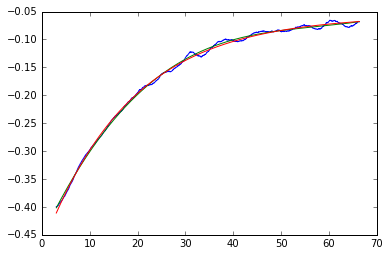

In [117]:
aa=100
xes = moving_average(X[Cut:eh],aa)
yes = moving_average(Y[Cut:eh],aa)
plt.plot(xes,yes)

poly=np.polyfit(xes,yes,3)

plt.plot(xes,np.poly1d(poly)(xes))

plt.plot(xes,exponenial_func(xes,*popt),'r',label='fit')

#plt.ylim(-5,0)
#
#plt.xlim(1,5)

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


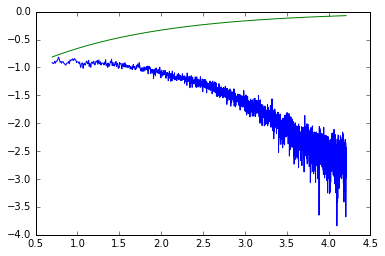

In [14]:
x = np.log(X[Cut:eh])
y = np.log(abs(Y[Cut:eh]))
poly=np.polyfit(x,y,1)
plt.plot(x,y)
plt.plot(x,-np.exp(np.poly1d(poly)(x)))
#plt.plot(X[Cut:eh],abs(Y[Cut:eh]),color='r')


#plt.loglog()
plt.show()

In [ ]:
plt.plot(X[Cut:eh],exponenial_func(X[Cut:eh],*popt),'r',label='fit')
plt.plot(X[Cut:eh],Y[Cut:eh],color='b')


In [121]:
xx = np.linspace(0,800,800)


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


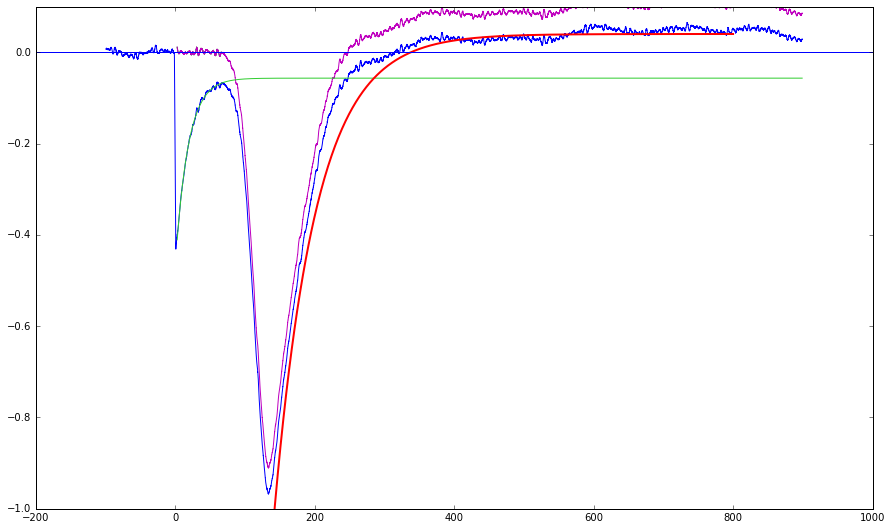

In [143]:
plt.figure(figsize=(15,9))
aa = 100
plt.plot(moving_average(X,aa),moving_average(Y,aa))

#plt.plot(moving_average(X[Cut:eh],aa),moving_average(Y[Cut:eh],aa),color='r')

ffit = exponenial_func(moving_average(X[Cut:eh],aa),*popt)


plt.plot(moving_average(X[Cut:eh],aa),moving_average(Y[Cut:eh],aa)-ffit,color='g')

#plt.plot(xes,exponenial_func(xes,*popt),'r',label='fit')



ffit = exponenial_func(moving_average(X[Cut:],aa),*popt)
plt.plot(moving_average(X[Cut:],aa),moving_average(Y[Cut:],aa)-ffit,color='m')
plt.plot(moving_average(X[Cut:],aa),ffit,color='limegreen')
plt.plot(xx,exponenial_func((xx-200),-0.4,60,0.04),color='r',linewidth=2)
#plt.plot(xes,np.poly1d(poly)(xes))

#plt.plot(X[Cut:],Y[Cut:]+np.exp(np.poly1d(poly)(X[Cut:])),color='k')
plt.ylim(-1,.1)
plt.axhline(0)
plt.show()

In [ ]:
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c


popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1))

In [5]:
names = []
for q in range(0,len(files)):
    na = files[q].split('-')[0]
    names.append(na)
names

['050', '075', '100', '125', '150', '175', '200']

In [6]:
ml = 1e3
Xvals=dict()
Yvals=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    Xvals[q] = Hold[0]*ml
    Yvals[q] = Hold[1]*ml

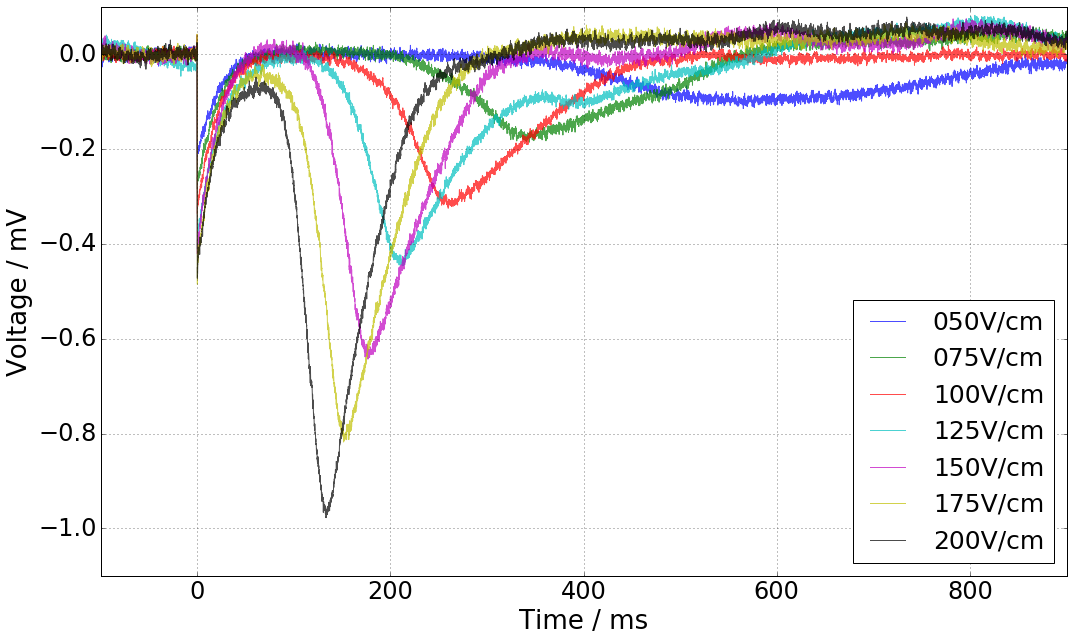

In [7]:
plt.figure(figsize=(15,9))

for q in range(0,len(files)):
    P=21
    PP=3
    XX = savgol_filter(Xvals[q],P,PP)
    YY = savgol_filter(Yvals[q],P,PP)
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-.1*ml,900)
plt.ylim(-1.1,.1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('ions-clean-90418.tif')
plt.show()

In [ ]:
TriggerTime = find_nearest(Xvals[0],0)
Trigger     = np.where(Xvals[0]==TriggerTime)[0][0]
Cut = 2*Trigger


In [ ]:
time,width = find_vals(Xvals[0],Yvals[0],Cut)
time

In [ ]:
Velocity=[]
Efield =[]
FWHM  =[]
for q in range(0,len(files)):
    time,width = find_vals(Xvals[q],Yvals[q],Cut)
    V      = 20/(time*1e-3)
    Velocity.append(V)
    Efield.append(float(names[q]))
    FWHM.append(width)
Velocity = np.array(Velocity)
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [ ]:
FWHM

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(Efield/2,Velocity,color='k',linewidth=3)

plt.xlim(0,105)
plt.ylim(20,155)
plt.xlabel(r'Eletric field  V/cm$\cdot$Bar',fontsize=26)
plt.ylabel(r'drift velocity cm/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
plt.show()

In [ ]:
vals = np.polyfit(Efield/2,Velocity,1)
np.poly1d(vals)[0]

In [ ]:
vals

In [ ]:
np.polyfit?

In [ ]:
poly

In [ ]:
FWHM[0:6]

In [ ]:
x = np.log(Efield[1:6])
y = np.log(FWHM[1:6])
poly=np.polyfit(x,y,1)

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,np.poly1d(poly)(x))

In [ ]:
poly

In [ ]:
np.poly1d?

In [ ]:
Efield, FWHM = zip(*sorted(zip(Efield, FWHM)))
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [ ]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)
popt
pcov

In [ ]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)

plt.figure(figsize=(7,7))
plt.scatter(Efield,FWHM,color='m',linewidth=3,label='data')
#plt.plot(Efield,ef(Efield,*popt),'r',label='fit')
x=np.arange(1,30,0.1)
plt.plot(np.exp(x),np.exp(np.poly1d(poly)(x)))

#vars=np.logspace(1,3,10)
#plt.plot(vars,10**np.poly1d(poly)(np.log(vars)))
plt.xlabel(r'Eletric field  V/cm',fontsize=26)
plt.ylabel(r'pulse FWHM ms',fontsize=26)
plt.xlim(10,1000)
plt.ylim(50,300)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(np.arange(50, 210, 25))
plt.loglog()
plt.legend(loc="upper right",fontsize=24)
plt.show()